In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Electric_Production.csv")

In [ ]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df.index

RangeIndex(start=0, stop=397, step=1)

In [ ]:
df.shape

(397, 2)

In [ ]:
df.iloc[:3,:1]

,DATE
0,1/1/1985
1,2/1/1985
2,3/1/1985


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [ ]:
df.rename(columns={'IPG2211A2N':"value"},inplace=True)

In [ ]:
df.head()

,DATE,value
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


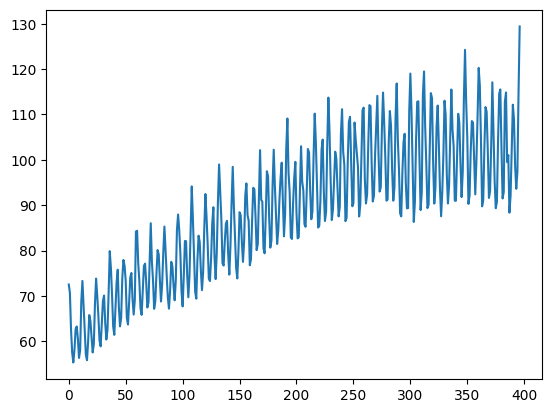

In [ ]:
plt.plot(df['value'])

In [ ]:
df.set_index(df['DATE'],inplace=True)

In [ ]:
df.head()

,DATE,value
DATE,,
1/1/1985,1/1/1985,72.5052
2/1/1985,2/1/1985,70.6720
3/1/1985,3/1/1985,62.4502
4/1/1985,4/1/1985,57.4714
5/1/1985,5/1/1985,55.3151


In [ ]:
df.drop(['DATE'],axis=1,inplace=True)

In [ ]:
df.head()

,value
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


In [ ]:
pd.to_datetime(df.index)

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

In [ ]:
df.head()

,value
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


In [ ]:
df.set_index(pd.to_datetime(df.index),inplace=True)

In [ ]:
df.head()

,value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df

,value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
train=df.iloc[:-60]
test=df.iloc[-60:]

In [ ]:
train.shape

(337, 1)

In [ ]:
test.shape

(60, 1)

In [ ]:
test.head()

,value
DATE,
2013-02-01,106.7340
2013-03-01,102.9948
2013-04-01,91.0092
2013-05-01,90.9634
2013-06-01,100.6957


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.77 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=1.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=1.84 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train,order=(2,1,4)).fit()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ="levels")

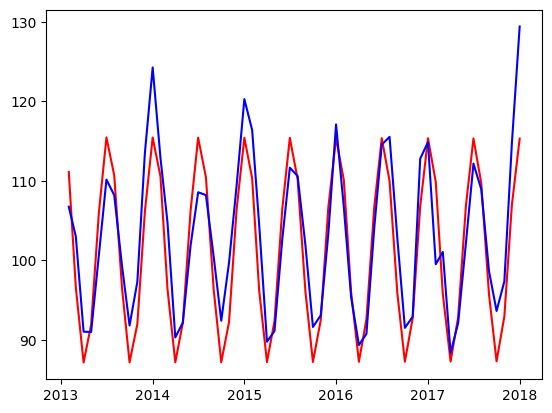

In [ ]:
plt.plot(pred,color="red")
plt.plot(test,color="blue")

In [ ]:
pred_future=model.predict(len(df),len(df)+6,typ="levels")

<Axes: >

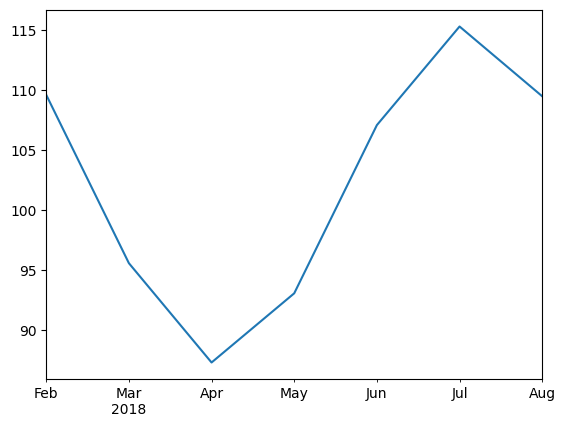

In [ ]:
pred_future.plot()

In [ ]:
pred2=model.predict(start=len(df),end=len(df)+6,typ="levels")


<Axes: >

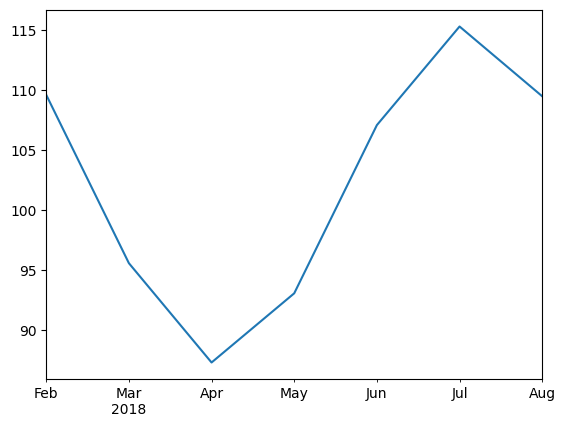

In [ ]:
pred2.plot()

In [ ]:
pred2

2018-02-01    109.587717
2018-03-01     95.567614
2018-04-01     87.296664
2018-05-01     93.058736
2018-06-01    107.067946
2018-07-01    115.278435
2018-08-01    109.466966
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
df.tail()

,value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048
